# IBM Applied Data Science Capstone Course by Coursera
## Vera Rykalina

### 1 Importing  libraries 


In [1]:
import sys
import io
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("All libraries imported!")
#%matplotlib

All libraries imported!


### 2 Wikipage data scrapping 

In [2]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Localities_of_Berlin").text

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# create a list to store localities data
localities = []

In [5]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category mw-category-columns")[0].findAll("li"):
    localities.append(row.text)

In [6]:
# create a new DataFrame from the list
ber_df = pd.DataFrame({"Locality": localities})
ber_df.head(10)

,Locality
0,Boroughs and neighborhoods of Berlin
1,Adlershof
2,Afrikanisches Viertel
3,Alt-Hohenschönhausen
4,Alt-Treptow
5,Altglienicke
6,Baumschulenweg
7,Biesdorf (Berlin)
8,Blankenburg (Berlin)
9,Blankenfelde


In [7]:
ber_df.drop(ber_df.index[[0]], inplace=True)

In [8]:
ber_df.head(6)

,Locality
1,Adlershof
2,Afrikanisches Viertel
3,Alt-Hohenschönhausen
4,Alt-Treptow
5,Altglienicke
6,Baumschulenweg


In [9]:
ber_df.reset_index(drop=True, inplace=True)

In [10]:
ber_df.columns

Index(['Locality'], dtype='object')

In [11]:
type(ber_df)

pandas.core.frame.DataFrame

In [12]:
ber_df.shape

(98, 1)

### 3 Getting geographical coordinates

In [13]:
# define a function to get coordinates
def get_latlng(locality):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Berlin, Germany'.format(locality))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [14]:
# Call the function to get the coordinates, store in a new list using list comprehension
coordinates = [ get_latlng(locality) for locality in ber_df["Locality"].tolist()]

In [22]:
print(coordinates[:3])
print(len(coordinates))

[[52.437790000000064, 13.547780000000046], [52.556812901451046, 13.334729616371035], [52.547060000000045, 13.500550000000032]]
98


In [17]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
ber_df_coor = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

In [24]:
print(ber_df_coor.head())
print(ber_df.shape)

    Latitude  Longitude
0  52.437790   13.54778
1  52.556813   13.33473
2  52.547060   13.50055
3  52.493500   13.45711
4  52.420060   13.53969
(98, 3)


In [25]:
# merge the coordinates into the original dataframe
ber_df['Latitude'] = ber_df_coor['Latitude']
ber_df['Longitude'] = ber_df_coor['Longitude']

In [26]:
# check the neighborhoods and the coordinates
print(ber_df.shape)
ber_df

(98, 3)


,Locality,Latitude,Longitude
0,Adlershof,52.437790,13.54778
1,Afrikanisches Viertel,52.556813,13.33473
2,Alt-Hohenschönhausen,52.547060,13.50055
3,Alt-Treptow,52.493500,13.45711
4,Altglienicke,52.420060,13.53969
5,Baumschulenweg,52.466770,13.48850
6,Biesdorf (Berlin),52.510040,13.55374
7,Blankenburg (Berlin),52.593320,13.45805
8,Blankenfelde,52.618550,13.39017
9,Bohnsdorf,52.401090,13.56057


In [27]:
# save the DataFrame as CSV file
ber_df.to_csv("berlin.csv", index=False)


### 4 Creating a map of Berlin with localities

In [39]:
# get the coordinates of Berlin
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="verarykalina@gmail.com")
#geolocator = Nominatim(geopy.geocoders.options.default_user_agent)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geograpical coordinate of Berlin, Germany {}, {}.".format(latitude, longitude))

The geograpical coordinate of Berlin, Germany 52.5186925, 13.3996024.


In [40]:
# create map of Berlin using latitude and longitude values
map_ber = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
    label = '{}'.format(locality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#ff00ff',
        fill_opacity=0.7).add_to(map_ber)  
    
map_ber

In [42]:
# save the map as HTML file
map_ber.save('map_ber.html')

### 5 Visualizing features of localities

In [48]:
df1 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[2]
df1[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df2 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[3]
df2[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df3 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[4]
df3[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df4 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[5]
df4[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df5 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[6]
df5[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df6 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[7]
df6[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df7 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[8]
df7[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df8 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[9]
df8[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df9 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[10]
df9[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df10 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[11]
df10[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df11 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[12]
df11[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]

df12 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[13]
df12[["Locality", "Area in km2", "Population as of 2008", 'Density inhabitants per km2']]


,Locality,Area in km2,Population as of 2008,Density inhabitants per km2
0,(1201) Reinickendorf,10.50,72859,6939
1,(1202) Tegel,33.70,33417,992
2,(1203) Konradshöhe,2.20,5997,2726
3,(1204) Heiligensee,10.70,17641,1649
4,(1205) Frohnau,7.80,17025,2183
5,(1206) Hermsdorf,6.10,16503,2705
6,(1207) Waidmannslust,2.30,10022,4357
7,(1208) Lübars,5.00,4915,983
8,(1209) Wittenau,5.87,22696,3866
9,(1210) Märkisches Viertel,3.20,35206,11002


In [49]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
locality_data = pd.concat(dataframes)
locality_data.reset_index(drop=True, inplace=True)

In [50]:
locality_list=[]
for i in locality_data["Locality"]:
    i=i[6:]
    print(i)    
    locality_list.append(i)
    
locality_clean=pd.DataFrame({"Locality": locality_list})
locality_data["Locality"]=locality_clean['Locality']
locality_data.columns

 Mitte
 Moabit
 Hansaviertel
 Tiergarten
 Wedding
 Gesundbrunnen
 Friedrichshain
 Kreuzberg
 Prenzlauer Berg
 Weißensee
 Blankenburg
 Heinersdorf
 Karow
 Stadtrandsiedlung Malchow
 Pankow
 Blankenfelde
 Buch
 Französisch Buchholz
 Niederschönhausen
 Rosenthal
 Wilhelmsruh
 Charlottenburg
 Wilmersdorf
 Schmargendorf
 Grunewald
 Westend
 Charlottenburg-Nord
 Halensee
 Spandau
 Haselhorst
 Siemensstadt
 Staaken
 Gatow
 Kladow
 Hakenfelde
 Falkenhagener Feld
 Wilhelmstadt
 Steglitz
 Lichterfelde
 Lankwitz
 Zehlendorf
 Dahlem
 Nikolassee
 Wannsee
 Schöneberg
 Friedenau
 Tempelhof
 Mariendorf
 Marienfelde
 Lichtenrade
 Neukölln
 Britz
 Buckow
 Rudow
 Gropiusstadt
 Alt-Treptow
 Plänterwald
 Baumschulenweg
 Johannisthal
 Niederschöneweide
 Altglienicke
 Adlershof
 Bohnsdorf
 Oberschöneweide
 Köpenick
 Friedrichshagen
 Rahnsdorf
 Grünau
 Müggelheim
 Schmöckwitz
 Marzahn
 Biesdorf
 Kaulsdorf
 Mahlsdorf
 Hellersdorf
 Friedrichsfelde
 Karlshorst
 Lichtenberg
 Falkenberg
 Malchow
 Wartenberg
 Neu-H

Index(['Locality', 'Area in km2', 'Population as of 2008',
       'Density inhabitants per km2', 'Map'],
      dtype='object')

In [51]:
locality_data.drop('Map', axis=1, inplace=True)
locality_data.head(10)

,Locality,Area in km2,Population as of 2008,Density inhabitants per km2
0,Mitte,10.70,79582,7445
1,Moabit,7.72,69425,8993
2,Hansaviertel,0.53,5889,11111
3,Tiergarten,5.17,12486,2415
4,Wedding,9.23,76363,8273
5,Gesundbrunnen,6.13,82729,13496
6,Friedrichshain,9.78,114050,11662
7,Kreuzberg,10.40,147227,14184
8,Prenzlauer Berg,11.00,142319,12991
9,Weißensee,7.93,45485,5736


In [52]:
# merge the coordinates into the original dataframe
locality_data['Latitude'] = ber_df_coor['Latitude']
locality_data['Longitude'] = ber_df_coor['Longitude']
locality_data.head()

,Locality,Area in km2,Population as of 2008,Density inhabitants per km2,Latitude,Longitude
0,Mitte,10.70,79582,7445,52.437790,13.54778
1,Moabit,7.72,69425,8993,52.556813,13.33473
2,Hansaviertel,0.53,5889,11111,52.547060,13.50055
3,Tiergarten,5.17,12486,2415,52.493500,13.45711
4,Wedding,9.23,76363,8273,52.420060,13.53969


In [54]:
locality_data.sort_values(by=['Density inhabitants per km2', 'Area in km2'], ascending=False, inplace=True)
locality_sorted=locality_data.head(20)
locality_sorted

,Locality,Area in km2,Population as of 2008,Density inhabitants per km2,Latitude,Longitude
45,Friedenau,1.65,26736,16204,52.443410,13.58325
83,Fennpfuhl,2.12,30932,14591,52.457840,13.31808
7,Kreuzberg,10.40,147227,14184,52.593320,13.45805
5,Gesundbrunnen,6.13,82729,13496,52.466770,13.48850
54,Gropiusstadt,2.66,35844,13475,52.438550,13.38779
50,Neukölln,11.70,154127,13173,52.432930,13.31894
8,Prenzlauer Berg,11.00,142319,12991,52.618550,13.39017
22,Wilmersdorf,7.16,92815,12963,52.505270,13.51326
6,Friedrichshain,9.78,114050,11662,52.510040,13.55374
21,Charlottenburg,10.60,118704,11198,52.472970,13.33269


In [55]:
locality_sorted.reset_index(drop=True, inplace=True)

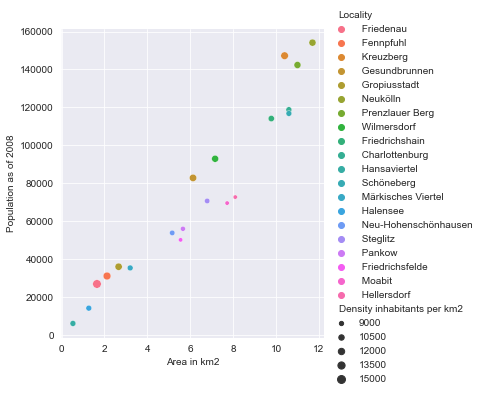

In [59]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.relplot(x="Area in km2", y="Population as of 2008", data=locality_sorted, kind="scatter", hue="Locality", size="Density inhabitants per km2")
plt.savefig("Population", dpi=240)
plt.show()


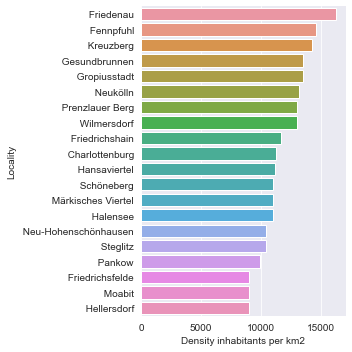

<Figure size 432x288 with 0 Axes>

In [60]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.catplot(y="Locality", x="Density inhabitants per km2", data=locality_sorted, kind="bar")
plt.show()
plt.savefig("Density", dpi=300)

### 6 Using the Foursquare API to explore the localities

In [86]:
import getpass  
CLIENT_SECRET = getpass.getpass()  
print(CLIENT_SECRET)


········
'ZKOYJBASSAXG3KQGM5OCQTURMSWXKA43R3QQL3D00PC2N1VJ'


In [90]:

CLIENT_ID = '2HPNYCXJHXXMYHZ1MHPCURQXBLEZDCWG2B2P3X0HRS1MW45E' # your Foursquare ID
CLIENT_SECRET = 'ZKOYJBASSAXG3KQGM5OCQTURMSWXKA43R3QQL3D00PC2N1VJ'
VERSION = '20191227'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2HPNYCXJHXXMYHZ1MHPCURQXBLEZDCWG2B2P3X0HRS1MW45E


####  Select top 100 venues that are within a radius of 1000 meters

In [103]:
radius = 1000
LIMIT = 100


def getNearbyVenues(Latitude, Longitude, Locality, radius=1000):
    venues = []

    for lat, long, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
        # create the API request URL
     url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
     results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
        locality,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
        
    
    
    venue_df = pd.DataFrame([item for venue in venues for item in venue])
    venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    
    
    
    return(venues_df)
venues_df.head(10)      


NameError: name 'venues_df' is not defined

In [84]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items'] # make the GET request
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            locality,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))  

KeyError: 'groups'

In [79]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

print(venues_df.shape)
venues_df.head(10)

NameError: name 'venues' is not defined

In [100]:
ber_5_local_venues = getNearbyVenues(Locality=locality_data['Locality'],
                                   Latitude=locality_data['Latitude'],
                                   Longitude=locality_data['Longitude']
                                  )

In [101]:
venues_df.groupby(["Locality"]).count()
#venues_df.value_counts()

,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Adlershof,20,20,20,20,20,20
Alt-Hohenschönhausen,40,40,40,40,40,40
Alt-Treptow,67,67,67,67,67,67
Altglienicke,10,10,10,10,10,10
Baumschulenweg,31,31,31,31,31,31
Biesdorf (Berlin),15,15,15,15,15,15
Blankenburg (Berlin),6,6,6,6,6,6
Blankenfelde,4,4,4,4,4,4
Bohnsdorf,5,5,5,5,5,5


#### Finding out unique venues

In [102]:
print('There are {} uniques categories.'.format(len(venues_df['Venue Category'].unique())))

There are 337 uniques categories.


In [103]:
# print out the list of categories
venues_df['Venue Category'].unique()[:10]

array(['Italian Restaurant', 'Greek Restaurant', 'Drugstore',
       'Gym / Fitness Center', 'Trattoria/Osteria', 'Supermarket', 'Bank',
       'Steakhouse', 'Pizza Place', 'Hardware Store'], dtype=object)

In [104]:
print (venues_df['Venue Category'].value_counts())

Supermarket                                 272
Café                                        192
Italian Restaurant                          137
Bakery                                      101
Hotel                                        88
German Restaurant                            84
Drugstore                                    80
Bus Stop                                     75
Park                                         73
Coffee Shop                                  67
Bar                                          66
Ice Cream Shop                               61
Plaza                                        50
Tram Station                                 48
Restaurant                                   48
Pizza Place                                  42
Gym / Fitness Center                         40
Trattoria/Osteria                            39
Vietnamese Restaurant                        35
Indian Restaurant                            33
Chinese Restaurant                      

In [105]:
# check if the result contains any yoga studio
"Gym / Fitness Center" in venues_df['Venue Category'].unique()

True

In [106]:
# create a dataframe of top 15 categories
venues_df_top15 = venues_df['Venue Category'].value_counts()[0:15].to_frame(name='frequency')
venues_df_top15=venues_df_top15.reset_index()
venues_df_top15.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
venues_df_top15

,Venue Category,Frequency
0,Supermarket,272
1,Café,192
2,Italian Restaurant,137
3,Bakery,101
4,Hotel,88
5,German Restaurant,84
6,Drugstore,80
7,Bus Stop,75
8,Park,73
9,Coffee Shop,67


In [107]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=venues_df_top15)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('15 Most Frequently Occuring Venues in Berlin', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

### 7 Analyzing each locality

In [ ]:
# one hot encoding
ber_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add locality column to the dataframe
ber_onehot['Locality'] = venues_df['Locality'] 

# move locality column to the first column
fixed_columns = [ber_onehot.columns[-1]] + list(ber_onehot.columns[:-1])
ber_onehot = ber_onehot[fixed_columns]


#### Groupping the rows by locality and by taking the mean of the frequency of occurrence of each category

In [ ]:
ber_grouped = ber_onehot.groupby(["Locality"]).mean().reset_index()
ber_grouped.index = np.arange(1, len(ber_grouped)+1)
print(ber_grouped.shape)
ber_grouped


#### Creating a new data frame for a yoga studio

In [ ]:
ber_yoga = ber_grouped[["Locality","Gym / Fitness Center"]]
ber_yoga.head()

### 8 Clustering localities
#### Running k-means algorithm to cluster the localities in Berlin into 3 clusters

In [ ]:
# set number of clusters
kclusters = 3

ber_clustering = ber_yoga.drop(["Locality"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ber_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

In [ ]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each locality
ber_merged = ber_yoga.copy()

# add clustering labels
ber_merged["Cluster Labels"] = kmeans.labels_
ber_merged.head(20)

In [ ]:
# merge ber_grouped with ber_data to add latitude/longitude for each locality
ber_merged = ber_merged.join(ber_df.set_index("Locality"), on="Locality")

print(ber_merged.shape)
# check the last columns
ber_merged.head()

In [ ]:
num_top_venues = 5

for places in ber_grouped['Locality']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = ber_grouped[ber_grouped['Locality'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
# sort the results by Cluster Labels
print(ber_merged.shape)
ber_merged.sort_values(["Cluster Labels"], inplace=True)
ber_merged

#### Visualizing the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7, tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ber_merged['Latitude'], ber_merged['Longitude'], ber_merged['Locality'], ber_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# save the map as HTML file
map_clusters.save('map_clusters.png')

### 9 Analyzing the clusters

In [ ]:
# cluster 0
ber_merged.loc[ber_merged['Cluster Labels'] == 0]

In [ ]:
# red, cluster 0
ber_merged.loc[ber_merged['Cluster Labels'] == 0].shape

In [ ]:
# cluster 1
ber_merged.loc[ber_merged['Cluster Labels'] == 1]

In [ ]:
# purple, cluster 1
ber_merged.loc[ber_merged['Cluster Labels'] == 1].shape

In [ ]:
# cluster 2
ber_merged.loc[ber_merged['Cluster Labels'] == 2]

In [ ]:
# mint, cluster 2
ber_merged.loc[ber_merged['Cluster Labels'] == 2].shape